In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files
dataset = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(dataset['Power2.csv']))

Saving Power2.csv to Power2.csv


In [3]:
dataset.head()

,Diagnosis,F1 = 1.896 Hz,F2 = 2.60699 Hz,F3= 2.72549 Hz,F4 = 0 Hz,F6 = 0.237 Hz
0,1,-33.96365,-37.33893,-38.44475,2.12946,-17.05243
1,1,-36.48426,-38.94922,-38.81038,1.54439,-21.00131
2,1,-36.48426,-38.94922,-38.81038,1.54439,-21.00131
3,1,-30.58541,-34.25155,-33.53224,3.43557,-13.57998
4,1,-33.53178,-35.20606,-37.10372,2.43515,-16.24663


In [19]:
y = dataset['Diagnosis']
X = dataset.drop(['Diagnosis'], axis = 1)

# Split the dataset to trainand test data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.3, random_state=0)

In [20]:
 parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 50, 
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6,
              'max_leaf_nodes': None}

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
RF_model = RandomForestClassifier(**parameters)

In [23]:
RF_model.fit(train_X, train_y)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=10, n_estimators=50)

In [24]:
RF_predictions = RF_model.predict(test_X)

In [25]:
score = accuracy_score(test_y ,RF_predictions)
print(score)

0.7878787878787878


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, RF_predictions, sample_weight=None, multioutput='uniform_average', squared=True)

0.32727272727272727

In [ ]:
percentage = RF_model.score(test_X, test_y)

In [ ]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(test_y, RF_predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(test_X)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[10  6]
 [12 27]]
Test Set: 55
Accuracy = 67.27272727272727 %


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator = RF_model, X= train_X, y= train_y, cv=10)
print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))

Accuracy:72.67%
Standard Deviation:11.72%


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_y,RF_predictions))

              precision    recall  f1-score   support

           0       0.45      0.62      0.53        16
           1       0.82      0.69      0.75        39

    accuracy                           0.67        55
   macro avg       0.64      0.66      0.64        55
weighted avg       0.71      0.67      0.68        55



In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
roc_curve(test_y, RF_predictions, pos_label=1, sample_weight=None, drop_intermediate=True)

(array([0.   , 0.375, 1.   ]),
 array([0.        , 0.69230769, 1.        ]),
 array([2, 1, 0]))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


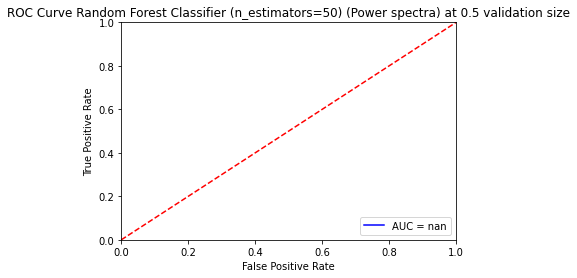

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = RF_model.predict_proba(test_X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, RF_predictions, pos_label = 2)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve Random Forest Classifier (n_estimators=50) (Power spectra) at 0.5 validation size')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.model_selection import learning_curve #learningcurves

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(
...     RF_model, X, y, train_sizes=(76,), cv=5)

In [ ]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
...     RF_model, X, y, # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:
train_mean = np.mean(train_scores, axis=1)# Create means and standard deviations of training set scores
train_std = np.std(train_scores, axis=1)

In [ ]:
test_mean = np.mean(test_scores, axis=1) # Create means and standard deviations of test set scores
test_std = np.std(test_scores, axis=1)

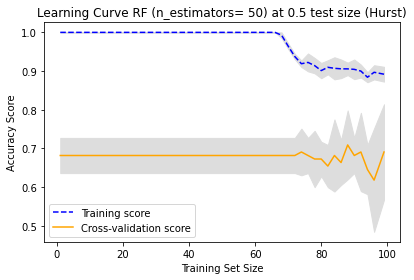

In [ ]:
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="orange", label="Cross-validation score")
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve RF (n_estimators= 50) at 0.5 test size (Hurst)")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()